<a href="https://colab.research.google.com/github/huyminh1115/Webmining-citation/blob/main/code/preprocessing_citation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path in Google Drive
file_path = '/content/drive/My Drive/data-citation/citation-raw.txt'  # Replace 'your_file_name.txt' with your actual file name


Mounted at /content/drive


In [28]:
# Initialize variables to store the parsed data
data = []

# Open and read the file
with open(file_path, 'r') as file:
    current_paper = {}
    for line in file:
        line = line.strip()
        if not line:  # Skip empty lines
            continue
        if line.startswith('#*'):
            if current_paper:
                # Save the previous paper before starting a new one
                current_paper['References'] = ', '.join(current_paper.get('References', [])) if current_paper.get('References') else None
                data.append(current_paper)
            current_paper = {'Title': line[2:].strip(), 'References': []}
        elif line.startswith('#@'):
            current_paper['Authors'] = line[2:].strip()
        elif line.startswith('#t'):
            current_paper['Year'] = line[2:].strip()
        elif line.startswith('#c'):
            current_paper['Venue'] = line[2:].strip()
        elif line.startswith('#index'):
            current_paper['Index'] = line[6:].strip()
        elif line.startswith('#%'):
            current_paper['References'].append(line[2:].strip())
        elif line.startswith('#!'):
            current_paper['Abstract'] = line[2:].strip()

    # Add the last paper
    if current_paper:
        current_paper['References'] = ', '.join(current_paper.get('References', [])) if current_paper.get('References') else None
        data.append(current_paper)

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Ensure all columns are present in the DataFrame
default_columns = ['Title', 'Authors', 'Year', 'Venue', 'Index', 'References', 'Abstract']
for col in default_columns:
    if col not in df.columns:
        df[col] = None

df = df[['Title', 'Authors', 'Year', 'Venue', 'Index', 'References', 'Abstract']]

In [29]:
# Display the DataFrame
df.head(20)

,Title,Authors,Year,Venue,Index,References,Abstract
0,OQL[C++]: Extending C++ with an Object Query C...,José A. Blakeley,1995,Modern Database Systems,0,None,NaN
1,Transaction Management in Multidatabase Systems.,"Yuri Breitbart,Hector Garcia-Molina,Abraham Si...",1995,Modern Database Systems,1,None,NaN
2,Overview of the ADDS System.,"Yuri Breitbart,Tom C. Reyes",1995,Modern Database Systems,2,None,NaN
3,Multimedia Information Systems: Issues and App...,"Stavros Christodoulakis,Leonidas Koveos",1995,Modern Database Systems,3,None,NaN
4,Active Database Systems.,"Umeshwar Dayal,Eric N. Hanson,Jennifer Widom",1995,Modern Database Systems,4,None,NaN
5,Where Object-Oriented DBMSs Should Do Better: ...,"Angelika Kotz Dittrich,Klaus R. Dittrich",1995,Modern Database Systems,5,None,NaN
6,Distributed Databases.,"Hector Garcia-Molina,Meichun Hsu",1995,Modern Database Systems,6,None,NaN
7,An Object-Oriented DBMS War Story: Developing ...,Nathan Goodman,1995,Modern Database Systems,7,None,NaN
8,Cooperative Transactions for Multiuser Environ...,Gail E. Kaiser,1995,Modern Database Systems,8,None,NaN
9,Schema Architecture of the UniSQL/M Multidatab...,"William Kelley,Sunit K. Gala,Won Kim,Tom C. Re...",1995,Modern Database Systems,9,None,NaN


In [43]:
# Additional code for statistics

# Check for missing values
missing_values = df.isna().sum()
print("Missing values per column:")
print(missing_values)


# Check for missing values (in percentage)
missing_values = df.isna().mean() * 100
print("Missing values per column (in %):")
print(missing_values)

# Summary statistics
print("\nSummary statistics:")
summary_stats = df.describe(include='all').transpose()

# Add % of unique and count to the summary statistics
summary_stats['% Unique'] = (df.nunique() / len(df) * 100).values
print(summary_stats)

Missing values per column:
Title               0
Authors             0
Year                0
Venue               0
Index               0
References    1198086
Abstract       981537
dtype: int64
Missing values per column (in %):
Title          0.000000
Authors        0.000000
Year           0.000000
Venue          0.000000
Index          0.000000
References    79.289097
Abstract      64.957926
dtype: float64

Summary statistics:
              count   unique  \
Title       1511035  1481988   
Authors     1511035  1043377   
Year        1511035       77   
Venue       1511035     6506   
Index       1511035  1511035   
References   312949   298948   
Abstract     529498   518901   

                                                          top    freq  \
Title                                              Editorial.    1980   
Authors                                                         13609   
Year                                                     2009  146916   
Venue              

In [39]:
# Access row n (replace n with the row number you want to access)
row_n = 20028  # Replace 0 with the index of the row you want to access
print(f"Row {row_n}:")
print(df.iloc[row_n])

Row 20028:
Title         Terminology Finite-State Preprocessing for Com...
Authors                                           Caroline Brun
Year                                                       1998
Venue                                                COLING-ACL
Index                                                     20028
References                               163380, 107407, 107408
Abstract      This paper presents a technique to deal with m...
Name: 20028, dtype: object


In [47]:
# Find indexes of rows with exact duplicate titles along with titles
duplicate_groups = (
    df.groupby('Title').apply(lambda x: {'Title': x.name, 'Indexes': list(x.index)} if len(x) > 1 else None)
    .dropna()
    .tolist()
)

print("\nGroups of rows with exact duplicate titles:")
for group in duplicate_groups:
    print(f"Title: {group['Title']}, Indexes: {group['Indexes']}")

<ipython-input-47-3a7f4968bbfa>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Title').apply(lambda x: {'Title': x.name, 'Indexes': list(x.index)} if len(x) > 1 else None)


Streaming output truncated to the last 5000 lines.
Title: Patterns in Enterprise Architecture Management (PEAM 2009)., Indexes: [579783, 1385143]
Title: Patterns of Co-Linear Equidistant Letter Sequences and Verses., Indexes: [346111, 346112, 346113]
Title: Patterns., Indexes: [860604, 1028753, 1070766, 1198742]
Title: Paul R. Cohen's Empirical Methods for Artificial Intelligence., Indexes: [744917, 745214]
Title: Peak Transform for Efficient Image Representation and Coding., Indexes: [428730, 1102750]
Title: Pedestrian detection and tracking at crossroads., Indexes: [320293, 1040787]
Title: Peer Data Management., Indexes: [1198095, 1295543]
Title: Peer data exchange., Indexes: [545024, 1118765]
Title: Peer to Peer., Indexes: [1197783, 1199303]
Title: Peer-Based Intelligent Tutoring Systems: A Corpus-Oriented Approach., Indexes: [1347281, 1376634]
Title: Peirce Algebras., Indexes: [39975, 876197]
Title: Penetration Testing., Indexes: [153104, 1197303]
Title: Pentium Pro Processor Desig

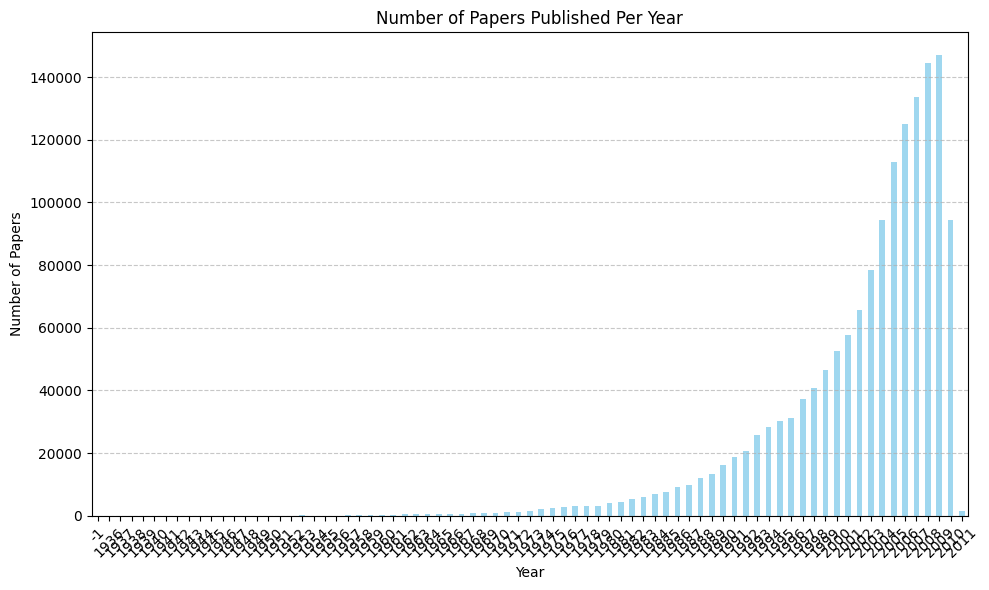

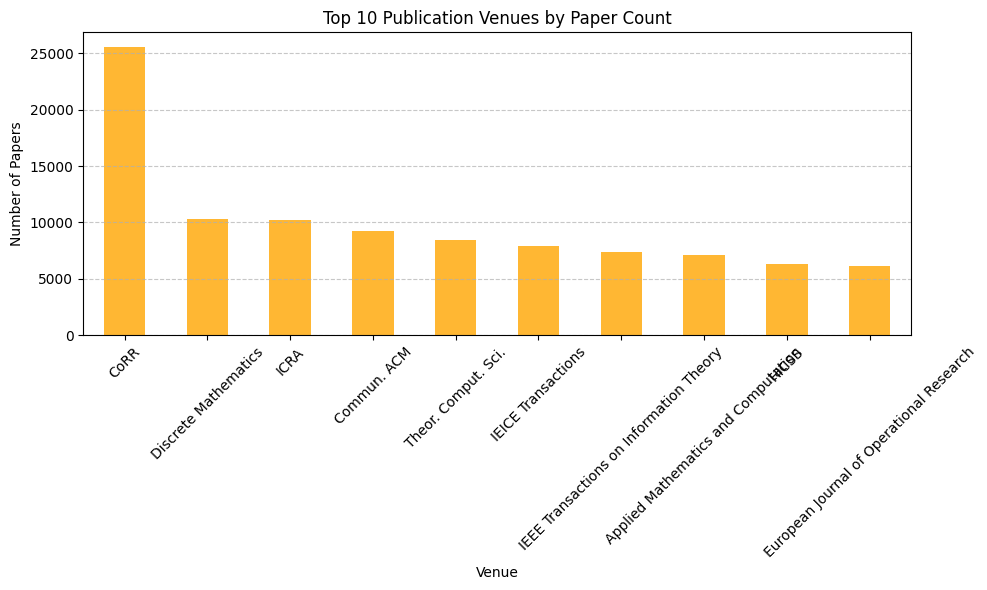

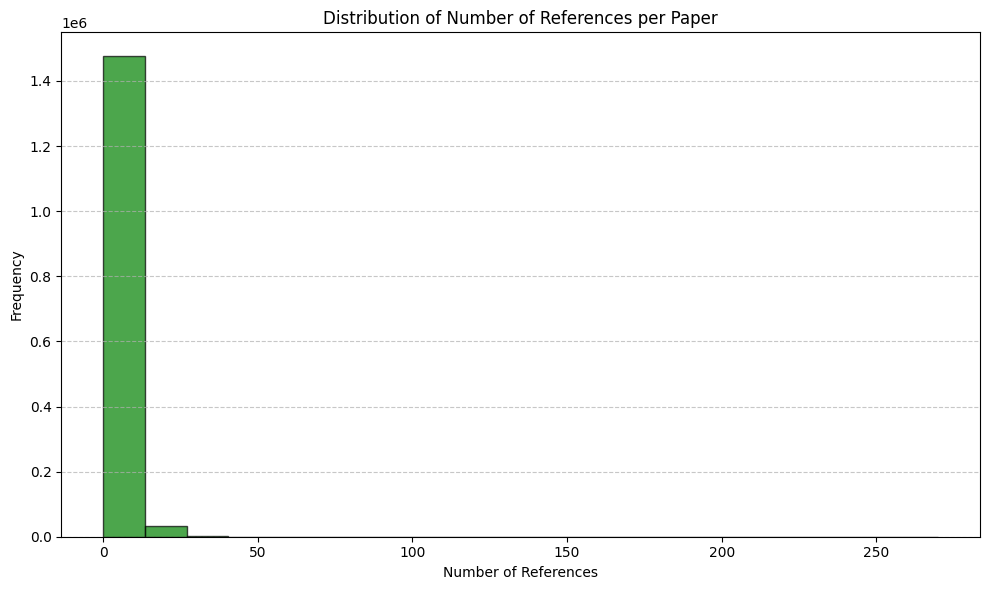

In [49]:
import matplotlib.pyplot as plt

# Visualization for insights
plt.figure(figsize=(10, 6))
# Plot the number of papers per year
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
num_papers_per_year = df['Year'].value_counts().sort_index()
num_papers_per_year.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Number of Papers Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the top 10 venues by paper count
plt.figure(figsize=(10, 6))
top_venues = df['Venue'].value_counts().head(10)
top_venues.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Top 10 Publication Venues by Paper Count')
plt.xlabel('Venue')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the number of references per paper (distribution)
plt.figure(figsize=(10, 6))
df['Num_References'] = df['References'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
df['Num_References'].plot(kind='hist', bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Number of References per Paper')
plt.xlabel('Number of References')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()